## Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.dates import DateFormatter
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

Insta_data = pd.read_csv('Instagram-Reach.csv')

print(Insta_data.head())


                  Date  Instagram reach
0  2022-04-01T00:00:00             7620
1  2022-04-02T00:00:00            12859
2  2022-04-03T00:00:00            16008
3  2022-04-04T00:00:00            24349
4  2022-04-05T00:00:00            20532


## Q.1: Import data and check null values, column info, and descriptive statistics of the data.

In [2]:
# Null values
null_data = Insta_data.isnull().sum()

# Descriptive statistics
descriptive_stats = Insta_data.describe()

print("Null values in the dataset:\n", null_data)

print("Column info:\n")
Insta_data.info()

print("Descriptive statistics:\n", descriptive_stats)




Null values in the dataset:
 Date               0
Instagram reach    0
dtype: int64
Column info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             365 non-null    object
 1   Instagram reach  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB
Descriptive statistics:
        Instagram reach
count       365.000000
mean      50474.712329
std       30051.787552
min        7620.000000
25%       25070.000000
50%       43987.000000
75%       68331.000000
max      161998.000000


## Q.2: Convert the Date column into datetime datatype.

In [3]:
# Now Converting Date column to datetime
Insta_data['Date'] = pd.to_datetime(Insta_data['Date'])

print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             365 non-null    datetime64[ns]
 1   Instagram reach  365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB
None


## Q.3: Analyze the trend of Instagram reach over time using a line chart.

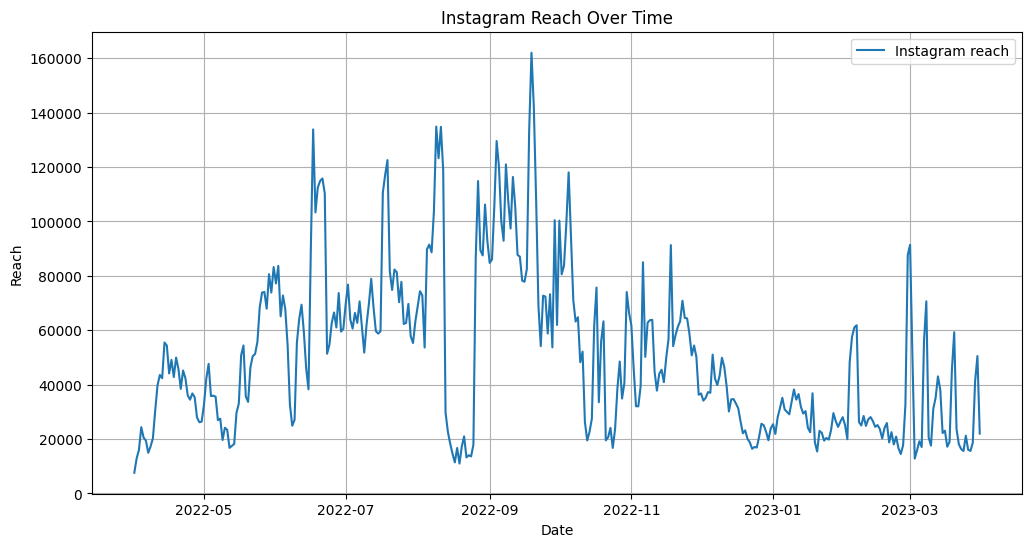

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(Insta_data['Date'], Insta_data['Instagram reach'], label='Instagram reach')
plt.xlabel('Date')
plt.ylabel('Reach')
plt.title('Instagram Reach Over Time')
plt.legend()
plt.grid(True)
plt.show()


## Q.4: Analyze Instagram reach for each day using a bar chart.

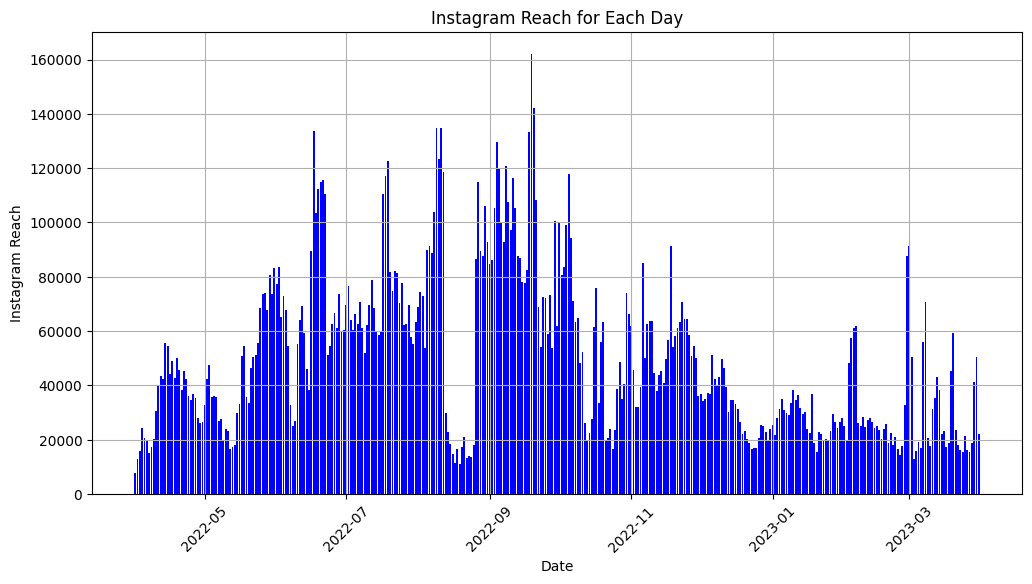

In [5]:
plt.figure(figsize=(12, 6))
plt.bar(Insta_data['Date'], Insta_data['Instagram reach'], color='blue')
plt.title('Instagram Reach for Each Day')
plt.xlabel('Date')
plt.ylabel('Instagram Reach')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Q.5: Analyze the distribution of Instagram reach using a box plot.

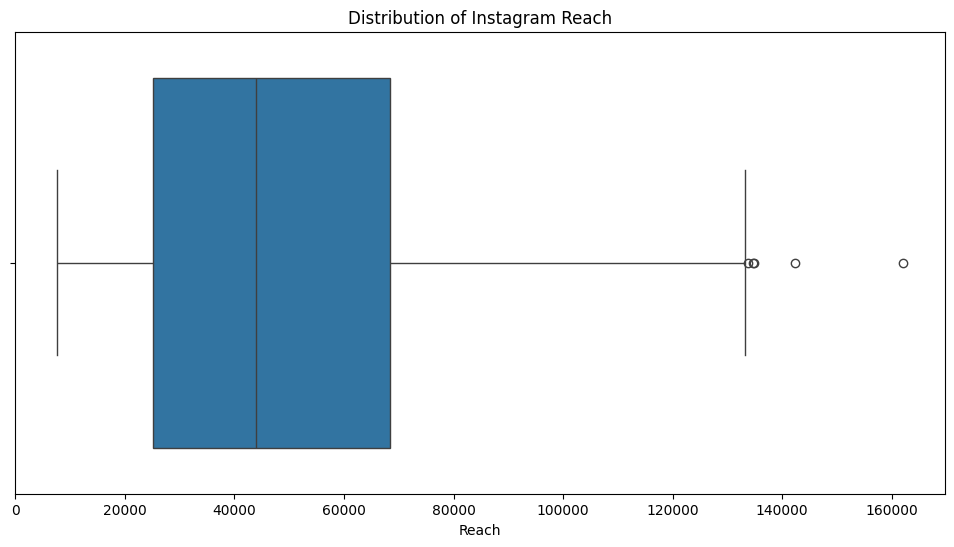

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=Insta_data['Instagram reach'])
plt.xlabel('Reach')
plt.title('Distribution of Instagram Reach')
plt.show()


## Q.6: Create a day column and analyze reach based on the days of the week.

In [7]:
# Setting Date column as the index
Insta_data.set_index('Date', inplace=True)

# Creating a day column
Insta_data['Day'] = Insta_data.index.day_name()
print(Insta_data.head())

# Now Grouping by Day and calculating mean, median, standard deviation
day_grouped = Insta_data.groupby('Day')['Instagram reach'].agg(['mean', 'median', 'std']).reset_index()

print(day_grouped)

            Instagram reach       Day
Date                                 
2022-04-01             7620    Friday
2022-04-02            12859  Saturday
2022-04-03            16008    Sunday
2022-04-04            24349    Monday
2022-04-05            20532   Tuesday
         Day          mean   median           std
0     Friday  46666.849057  35574.0  29856.943036
1     Monday  52621.692308  46853.0  32296.071347
2   Saturday  47374.750000  40012.0  27667.043634
3     Sunday  53114.173077  47797.0  30906.162384
4   Thursday  48570.923077  39150.0  28623.220625
5    Tuesday  54030.557692  48786.0  32503.726482
6  Wednesday  51017.269231  42320.5  29047.869685


## Q.7: Create a bar chart to visualize the reach for each day of the week.

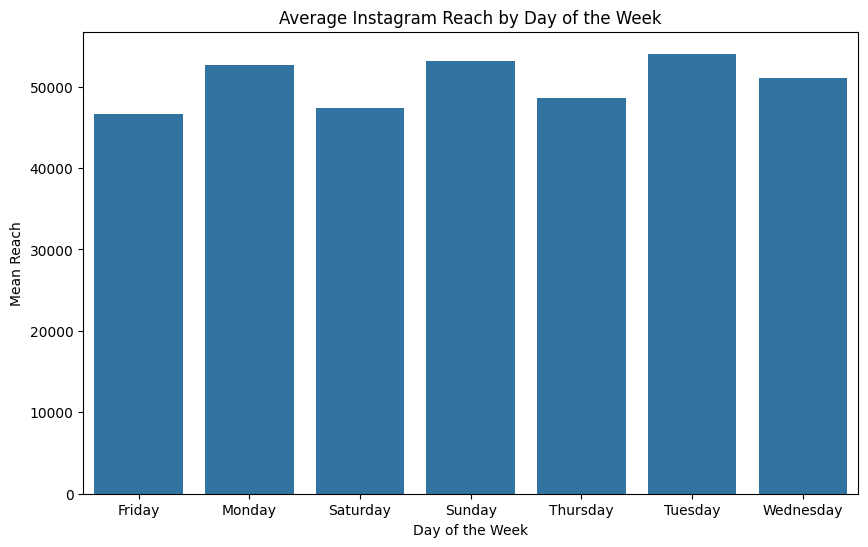

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Day', y='mean', Insta_data=day_grouped)
plt.xlabel('Day of the Week')
plt.ylabel('Mean Reach')
plt.title('Average Instagram Reach by Day of the Week')
plt.show()

## Q.8: Check the Trends and Seasonal patterns of Instagram reach


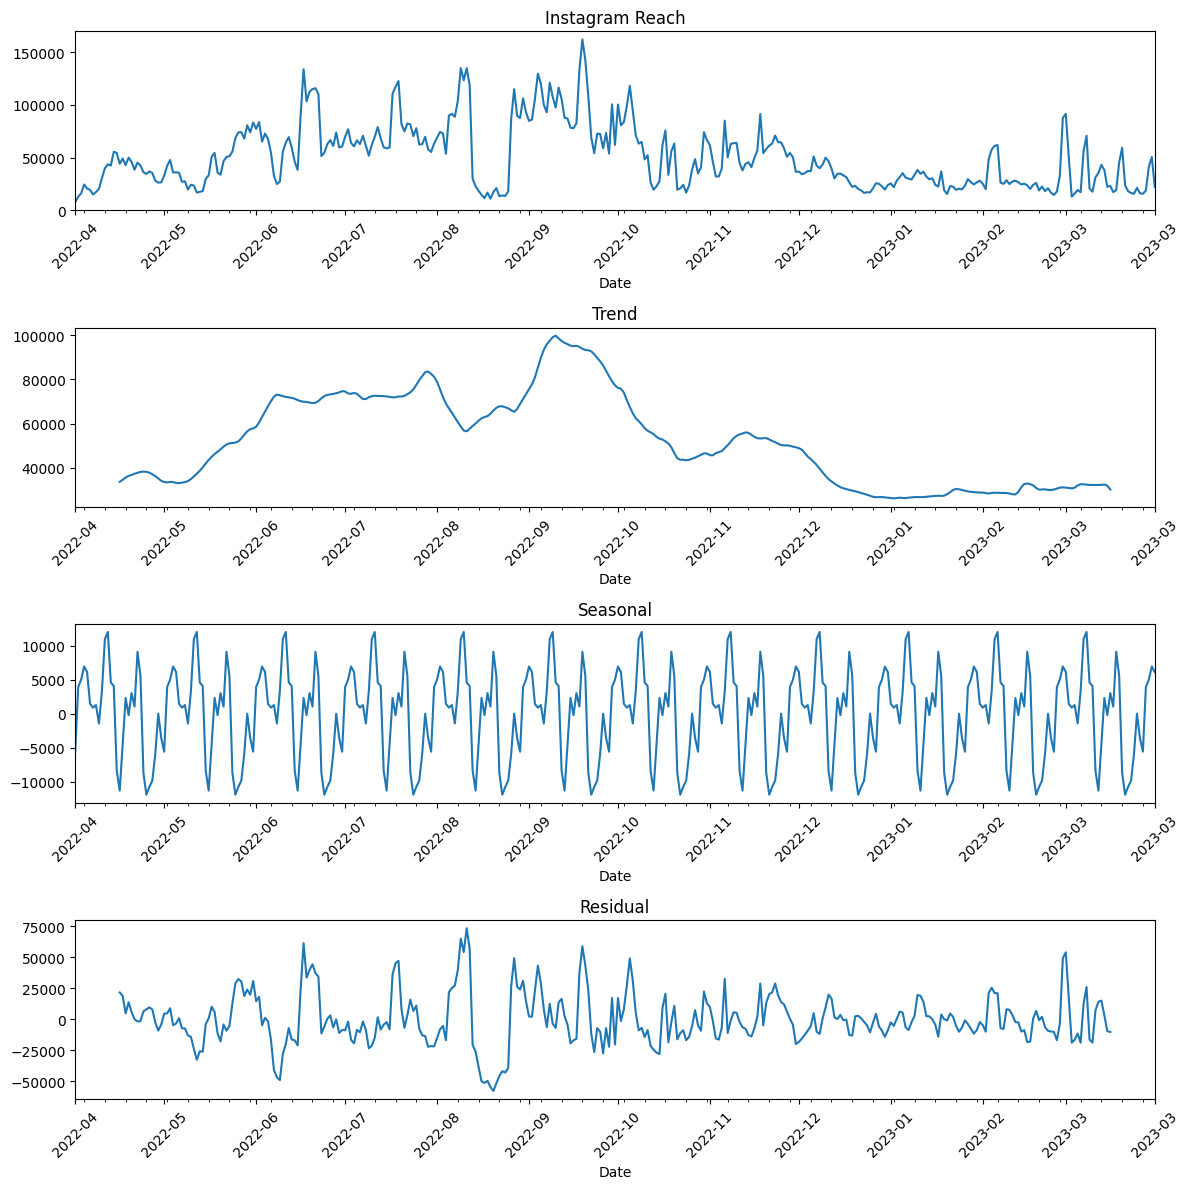

In [9]:
result = seasonal_decompose(Insta_data['Instagram reach'], model='additive', period=30)  
# Plotting the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 12))
result.observed.plot(ax=ax1)
result.trend.plot(ax=ax2)
result.seasonal.plot(ax=ax3)
result.resid.plot(ax=ax4)

# Setting titles
ax1.set_title('Instagram Reach')
ax2.set_title('Trend')
ax3.set_title('Seasonal')
ax4.set_title('Residual')

# Setting date format on x-axis
date_form = DateFormatter("%Y-%m")
ax1.xaxis.set_major_formatter(date_form)
ax2.xaxis.set_major_formatter(date_form)
ax3.xaxis.set_major_formatter(date_form)
ax4.xaxis.set_major_formatter(date_form)

# Rotating date labels
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45)

plt.tight_layout()
plt.show()



##  Q9: Use the SARIMA model to forecast the reach of the Instagram account

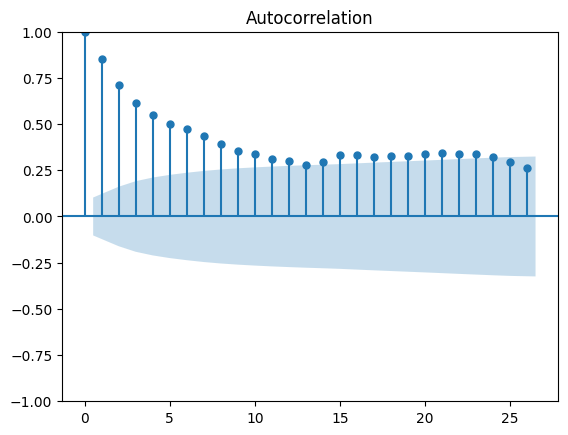

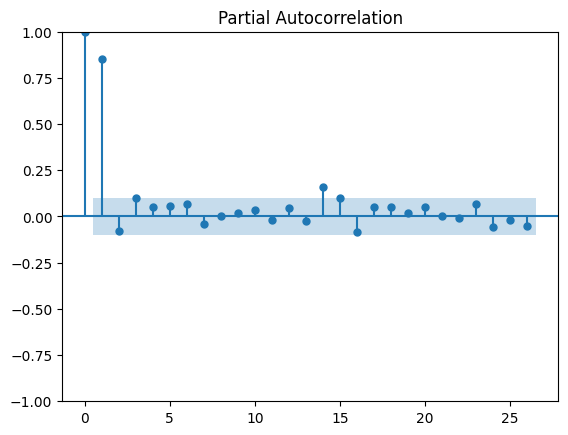

In [10]:
# Gven value of d
d = 1

# Determine p using ACF plot
plot_acf(Insta_data['Instagram reach'],)
plt.show()

# Determine q using PACF plot
plot_pacf(Insta_data['Instagram reach'],)
plt.show()


## Q10: Train a model using SARIMA and make predictions

c:\Users\PMYLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\PMYLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2023-04-01    25495.709383
2023-04-02    15587.001199
2023-04-03    17084.540065
2023-04-04    23202.162357
2023-04-05    30705.771939
2023-04-06    33421.502648
2023-04-07    26678.168769
2023-04-08    16168.573990
2023-04-09    18335.157035
2023-04-10    19017.444402
2023-04-11    21473.461311
2023-04-12    27403.419672
2023-04-13    30416.906358
2023-04-14    17820.849574
2023-04-15    18104.911175
2023-04-16    23111.823376
2023-04-17    29604.690279
2023-04-18    32167.206932
2023-04-19    25256.921324
2023-04-20    15219.006551
2023-04-21    17274.208376
2023-04-22    19323.584770
2023-04-23    22140.314401
2023-04-24    25631.892804
2023-04-25    28612.977653
2023-04-26    16150.371437
2023-04-27    16477.839961
2023-04-28    21529.667845
2023-04-29    28067.310835
2023-04-30    30621.139963
2023-05-01    23707.237144
Freq: D, Name: predicted_mean, dtype: float64


c:\Users\PMYLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


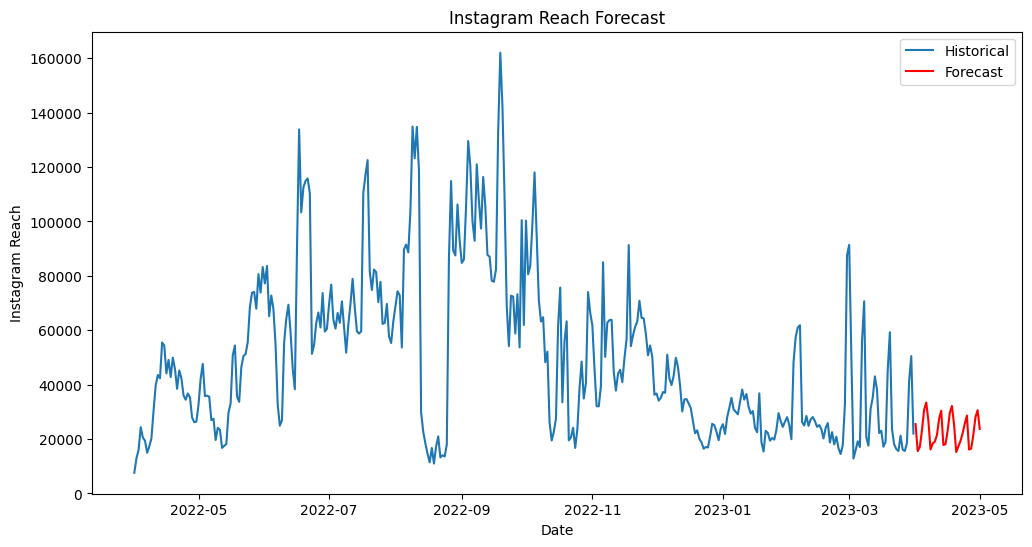

In [11]:
# Defining the SARIMA model
p = 1 # From PACF plot
q = 1 # Rrom ACF plot
model = SARIMAX(Insta_data['Instagram reach'], order=(p, d, q), seasonal_order=(p, d, q, 12))

# Fitting the model
model_fit = model.fit(disp=False)

predictions = model_fit.predict(start=len(Insta_data), end=len(Insta_data) + 30, typ='levels')
print(predictions)

plt.figure(figsize=(12, 6))
plt.plot(Insta_data['Instagram reach'], label='Historical')
plt.plot(predictions, label='Forecast', color='red')
plt.title('Instagram Reach Forecast')
plt.xlabel('Date')
plt.ylabel('Instagram Reach')
plt.legend()
plt.show()

